In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import warnings
from fplibrary import *
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)


apt_data = pd.read_csv('apartments_pl_2023.csv')
apt_data.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,9.0,0.118,1.389,0.628,0.105,1.652,NaN,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,0.291,0.348,1.404,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,32.0,0.175,0.259,0.223,0.359,0.101,0.310,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,1.0,0.218,1.690,0.504,0.704,0.501,2.138,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


In [ ]:
apt_data.columns

In [ ]:
apt_data.describe()

In [ ]:
mapped_data = map_feature(apt_data, feature = 'hasSecurity', mapping_dict = {'yes': 1, 'no': 0})
encoded_data = one_hot_encode_feature(mapped_data, feature = 'city')
imputed_df = impute_missing_knn(encoded_data, n_neighbors= 5)
imputed_df.head()

In [ ]:
visualize_data_relationship(apt_data, features = ['squareMeters', 'rooms', 'floor', 'buildYear', 'centreDistance', 'poiCount', 'price'])

In [ ]:
create_scatter_plots(apt_data, features=[('squareMeters', 'rooms'), ('squareMeters', 'buildYear')], n_rows=1, n_cols=2)

In [ ]:
create_boxplots(apt_data, y_feature='price', x_features=['city', 'type', 'ownership', 'condition', 'buildingMaterial', 'hasSecurity'], n_rows=2, n_cols=3)

In [ ]:
create_histograms(apt_data, ['squareMeters', 'rooms', 'floor', 'buildYear', 'centreDistance', 'poiCount'], bins=[30,5,20,30,30,30], n_rows=2, n_cols=3)

In [2]:
train_data = apt_data[['squareMeters', 'rooms', 'floor', 'price']]
train_data = impute_missing_knn(train_data, n_neighbors=7)
train_data.head()

,squareMeters,rooms,floor,price
0,63.00,3.0,4.0,415000.0
1,36.00,2.0,8.0,395995.0
2,73.02,3.0,2.0,565000.0
3,87.60,3.0,2.0,640000.0
4,66.00,3.0,1.0,759000.0


MSE for Linear Regression: 31722383149.61
MSE for LASSO: 31722383149.61
MSE for Ridge: 31722383149.61
Ridge Regression Regression Formula:
175749.40 + (5257.07 * squareMeters) + (32585.56 * rooms) + (-7851.53 * floor)


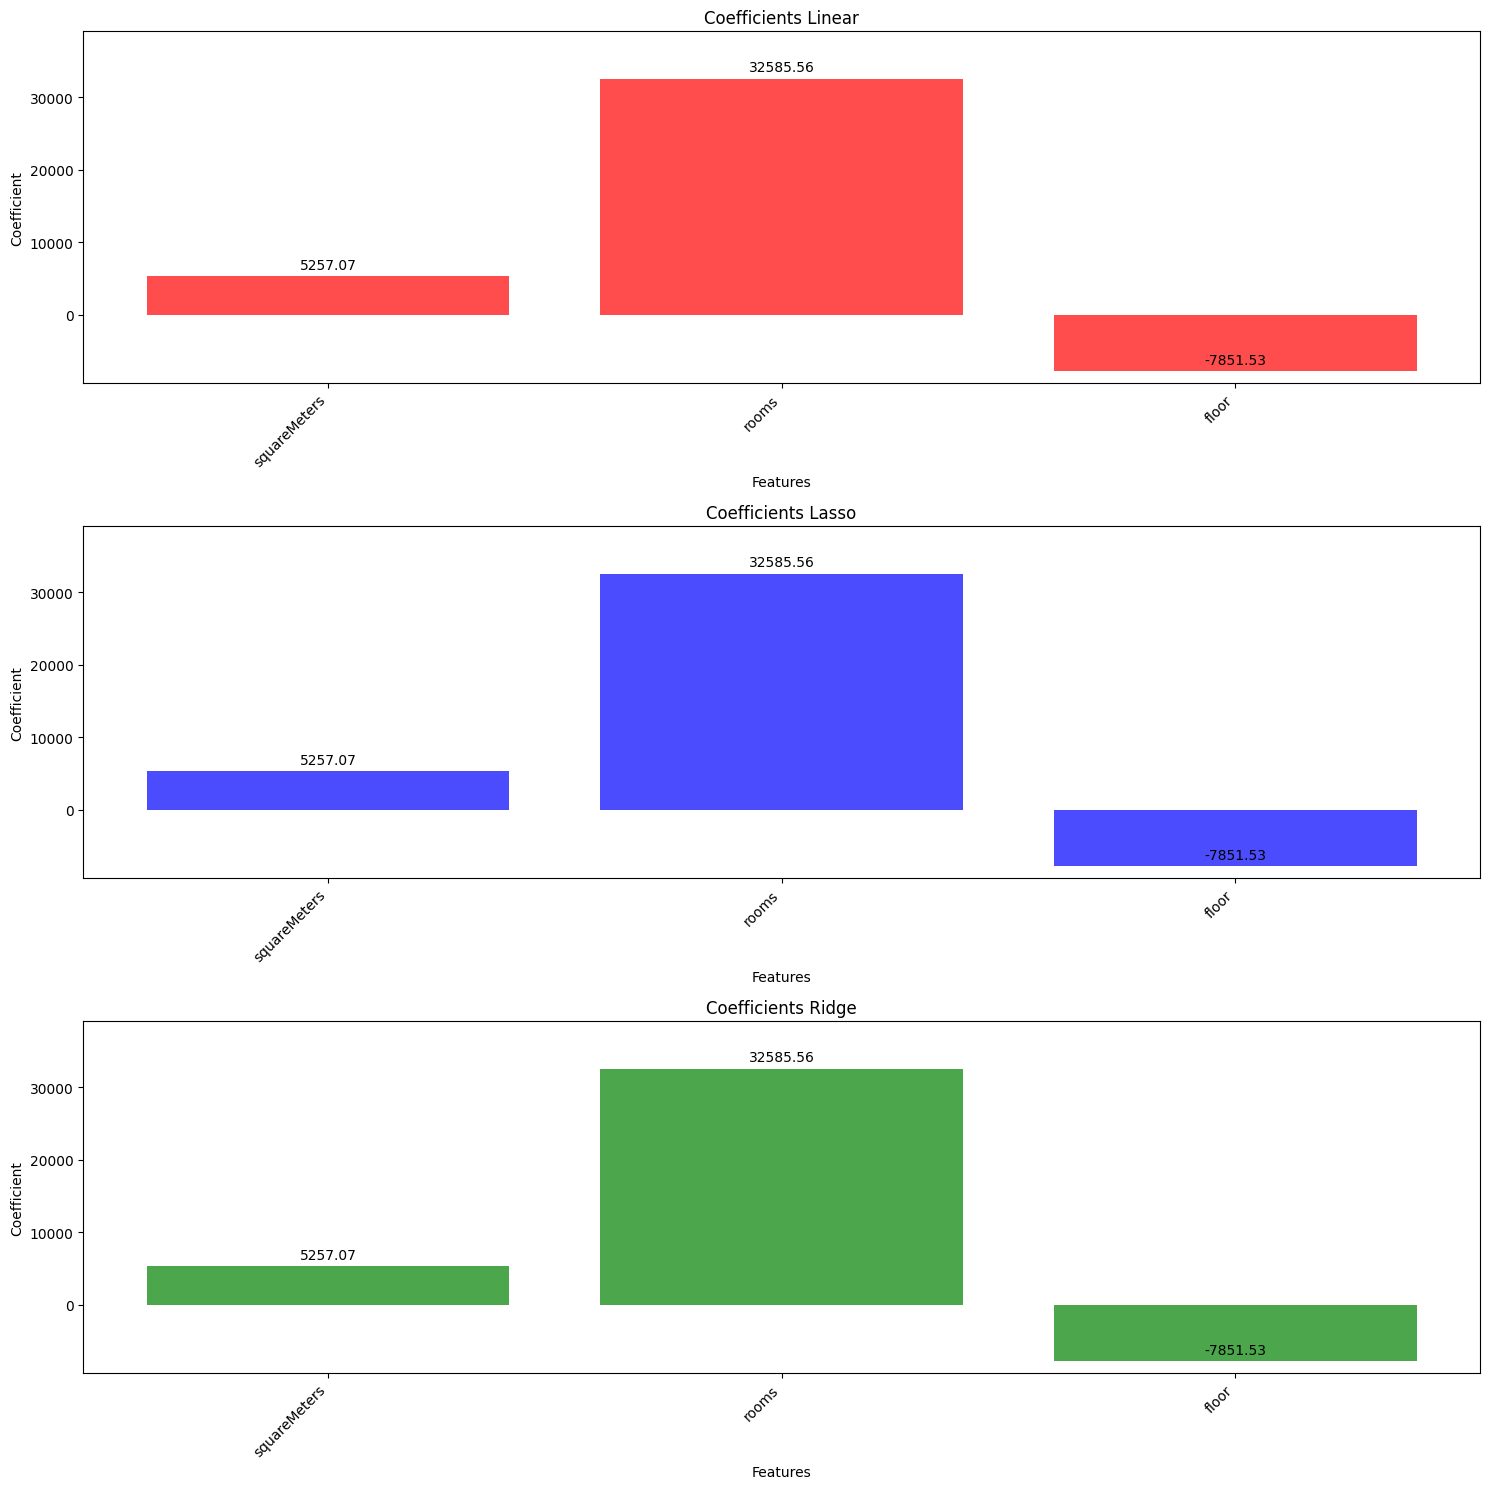

In [3]:
selected_model, selected_model_name, formula = find_best_regression_model(train_data[['squareMeters', 'rooms', 'floor']].head(1000), train_data['price'].head(1000))